In [0]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv to Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv']))

In [6]:
df.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

In [7]:
print(df.shape)

(11746, 60)


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

In [9]:
# Удаляем признаки, которые никак не влияют на результат

train = df[np.concatenate((np.array(df.columns[13:51]),np.array(df.columns[52:54]),np.array(df.columns[56:60])))]
train.columns

Index(['Borough', 'DOF Gross Floor Area',
       'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Fuel Oil #1 Use (kBtu)',
       'Fuel Oil #2 Use (kBtu)', 'Fuel Oil #4 Use (kBtu)',
       'Fuel Oil #5 & 6 Use (kBtu)', 'Diesel #2 Use (kBtu)'

In [10]:
# Преобразуем все числовые признаки во float64, заполнив при этом отсутствуюшие данные средними значениями

float_cols = ['DOF Gross Floor Area', 'Largest Property Use Type - Gross Floor Area (ft²)', '2nd Largest Property Use - Gross Floor Area (ft²)',
              '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built', 'Number of Buildings - Self-reported', 'Occupancy', 'ENERGY STAR Score',
              'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)', 'Weather Normalized Site Electricity Intensity (kWh/ft²)', 'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
              'Weather Normalized Source EUI (kBtu/ft²)', 'Fuel Oil #1 Use (kBtu)', 'Fuel Oil #2 Use (kBtu)', 'Fuel Oil #4 Use (kBtu)', 'Fuel Oil #5 & 6 Use (kBtu)', 'Diesel #2 Use (kBtu)',
              'District Steam Use (kBtu)', 'Natural Gas Use (kBtu)', 'Weather Normalized Site Natural Gas Use (therms)', 'Electricity Use - Grid Purchase (kBtu)', 'Weather Normalized Site Electricity (kWh)',
              'Total GHG Emissions (Metric Tons CO2e)', 'Direct GHG Emissions (Metric Tons CO2e)', 'Indirect GHG Emissions (Metric Tons CO2e)', 'Property GFA - Self-Reported (ft²)', 'Water Use (All Water Sources) (kgal)',
              'Water Intensity (All Water Sources) (gal/ft²)', 'Source EUI (kBtu/ft²)', 'Community Board', 'Council District', 'Census Tract']

for col in float_cols:
  train[col] = train[col].apply(lambda x: None if x == 'Not Available' else x)
  train[col] = pd.to_numeric(train[col])
  train[col].fillna((train[col].mean()), inplace=True)

print(train.info())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 44 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Borough                                                     11628 non-null  object 
 1   DOF Gross Floor Area                                        11746 non-null  float64
 2   Primary Property Type - Self Selected                       11746 non-null  object 
 3   List of All Property Use Types at Property                  11746 non-null  object 
 4   Largest Property Use Type                                   11746 non-null  object 
 5   Largest Property Use Type - Gross Floor Area (ft²)          11746 non-null  float64
 6   2nd Largest Property Use Type                               11746 non-null  object 
 7   2nd Largest Property Use - Gross Floor Area (ft²)           11746 non-null  float64
 

In [0]:
# Функция для one_hot_encoding преобразования признака

def one_hot_encoding(train, col):
  dummies = pd.get_dummies(train[col], prefix=col, dummy_na=False)  
  train = pd.concat([train, dummies], axis=1)
  train = train.drop([col], axis=1)
  return train

In [0]:
# Функция для распределения категориальных признаков по категориям

def process_categories(train, col):
  # NaN определяем в Other
  train[col].fillna("Other", inplace = True) 

  # Not Available определяем в Other
  train[col] = train[col].map(lambda x: 'Other' if x == 'Not Available' else x)
  counts = train[col].value_counts(dropna=False)

  # все, что меньше 100, определяем в категорию Other
  train[col] = train[col].map(lambda x: 'Other' if counts[x] < 100 else x)
  return train[col]

In [13]:
# Распределяем категориальные признаки по категориям, заменяя малочисленные категории на категорию Other

category_cols = np.array(train.select_dtypes(include='object').columns)
category_cols

array(['Borough', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type', '2nd Largest Property Use Type',
       '3rd Largest Property Use Type', 'Metered Areas (Energy)',
       'Metered Areas  (Water)', 'Water Required?',
       'DOF Benchmarking Submission Status', 'NTA'], dtype=object)

In [14]:
for col in category_cols:
  train[col] = process_categories(train, col)
  print(col)
  print(train[col].value_counts(dropna=False))
  print('')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

Borough
Manhattan        5176
Brooklyn         2265
Queens           2091
Bronx            1937
Staten Island     159
Other             118
Name: Borough, dtype: int64

Primary Property Type - Self Selected
Multifamily Housing           8688
Office                        1316
Other                         1123
Hotel                          223
Non-Refrigerated Warehouse     180
Residence Hall/Dormitory       109
College/University             107
Name: Primary Property Type - Self Selected, dtype: int64

List of All Property Use Types at Property
Multifamily Housing                           6182
Other                                         2970
Office                                         575
Multifamily Housing, Parking                   442
Multifamily Housing, Retail Store              413
Medical Office, Multifamily Housing            206
Office, Retail Store                           203
Multifamily Housing, Other                     191
Hotel                                 

In [15]:
# В List of All Property Use Types at Property есть подкатегории Multifamily Housing, определим их в Multifamily Housing

train['List of All Property Use Types at Property'] = train['List of All Property Use Types at Property'].map(lambda x: 'Multifamily Housing' if 'Multifamily Housing' in x else x)
train['List of All Property Use Types at Property'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Multifamily Housing           7703
Other                         2970
Office                         575
Office, Retail Store           203
Hotel                          172
Non-Refrigerated Warehouse     123
Name: List of All Property Use Types at Property, dtype: int64

In [16]:
# Water Required? - это бинарный признак, Yes or No, Other перенесем в No, и сделаем маппинг: 0 или 1

train['Water Required?'] = train['Water Required?'].map(lambda x: 'No' if x == 'Other' else x)
train['Water Required?'] = train['Water Required?'].map({ 'Yes': 1, 'No': 0 })
train['Water Required?'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1    7552
0    4194
Name: Water Required?, dtype: int64

In [17]:
# Metered Areas (Energy), Metered Areas  (Water), DOF Benchmarking Submission Status - тоже бинарные свойства

train['Metered Areas (Energy)'] = train['Metered Areas (Energy)'].map({ 'Whole Building': 1, 'Other': 0 })
train['Metered Areas  (Water)'] = train['Metered Areas  (Water)'].map({ 'Whole Building': 1, 'Other': 0 })
train['DOF Benchmarking Submission Status'] = train['DOF Benchmarking Submission Status'].map({ 'In Compliance': 1, 'Other': 0 })

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [18]:
train['Metered Areas (Energy)'].value_counts()

1    11648
0       98
Name: Metered Areas (Energy), dtype: int64

In [19]:
train['Metered Areas  (Water)'].value_counts()

1    7111
0    4635
Name: Metered Areas  (Water), dtype: int64

In [20]:
train['DOF Benchmarking Submission Status'].value_counts()

1    11716
0       30
Name: DOF Benchmarking Submission Status, dtype: int64

In [0]:
# NTA - слишком много категорий, выкидываем этот признак

train = train.drop(['NTA'], axis=1)

In [0]:
# Делаем one_hot_encoding для всех категориальных свойств, за исключением Water Required?, Metered Areas (Energy), Metered Areas  (Water), DOF Benchmarking Submission Status

for col in np.array([x for x in category_cols if x not in ['Water Required?', 'Metered Areas (Energy)', 'Metered Areas  (Water)', 'DOF Benchmarking Submission Status', 'NTA']]):
  train = one_hot_encoding(train, col)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 74 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   DOF Gross Floor Area                                                   11746 non-null  float64
 1   Largest Property Use Type - Gross Floor Area (ft²)                     11746 non-null  float64
 2   2nd Largest Property Use - Gross Floor Area (ft²)                      11746 non-null  float64
 3   3rd Largest Property Use Type - Gross Floor Area (ft²)                 11746 non-null  float64
 4   Year Built                                                             11746 non-null  int64  
 5   Number of Buildings - Self-reported                                    11746 non-null  int64  
 6   Occupancy                                                              11746 non-null 

In [24]:
# Преобразуем все uint8 к float64

for col in train.select_dtypes(include='uint8').columns:
  train[col] = train[col].astype(np.float64)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 74 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   DOF Gross Floor Area                                                   11746 non-null  float64
 1   Largest Property Use Type - Gross Floor Area (ft²)                     11746 non-null  float64
 2   2nd Largest Property Use - Gross Floor Area (ft²)                      11746 non-null  float64
 3   3rd Largest Property Use Type - Gross Floor Area (ft²)                 11746 non-null  float64
 4   Year Built                                                             11746 non-null  int64  
 5   Number of Buildings - Self-reported                                    11746 non-null  int64  
 6   Occupancy                                                              11746 non-null 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


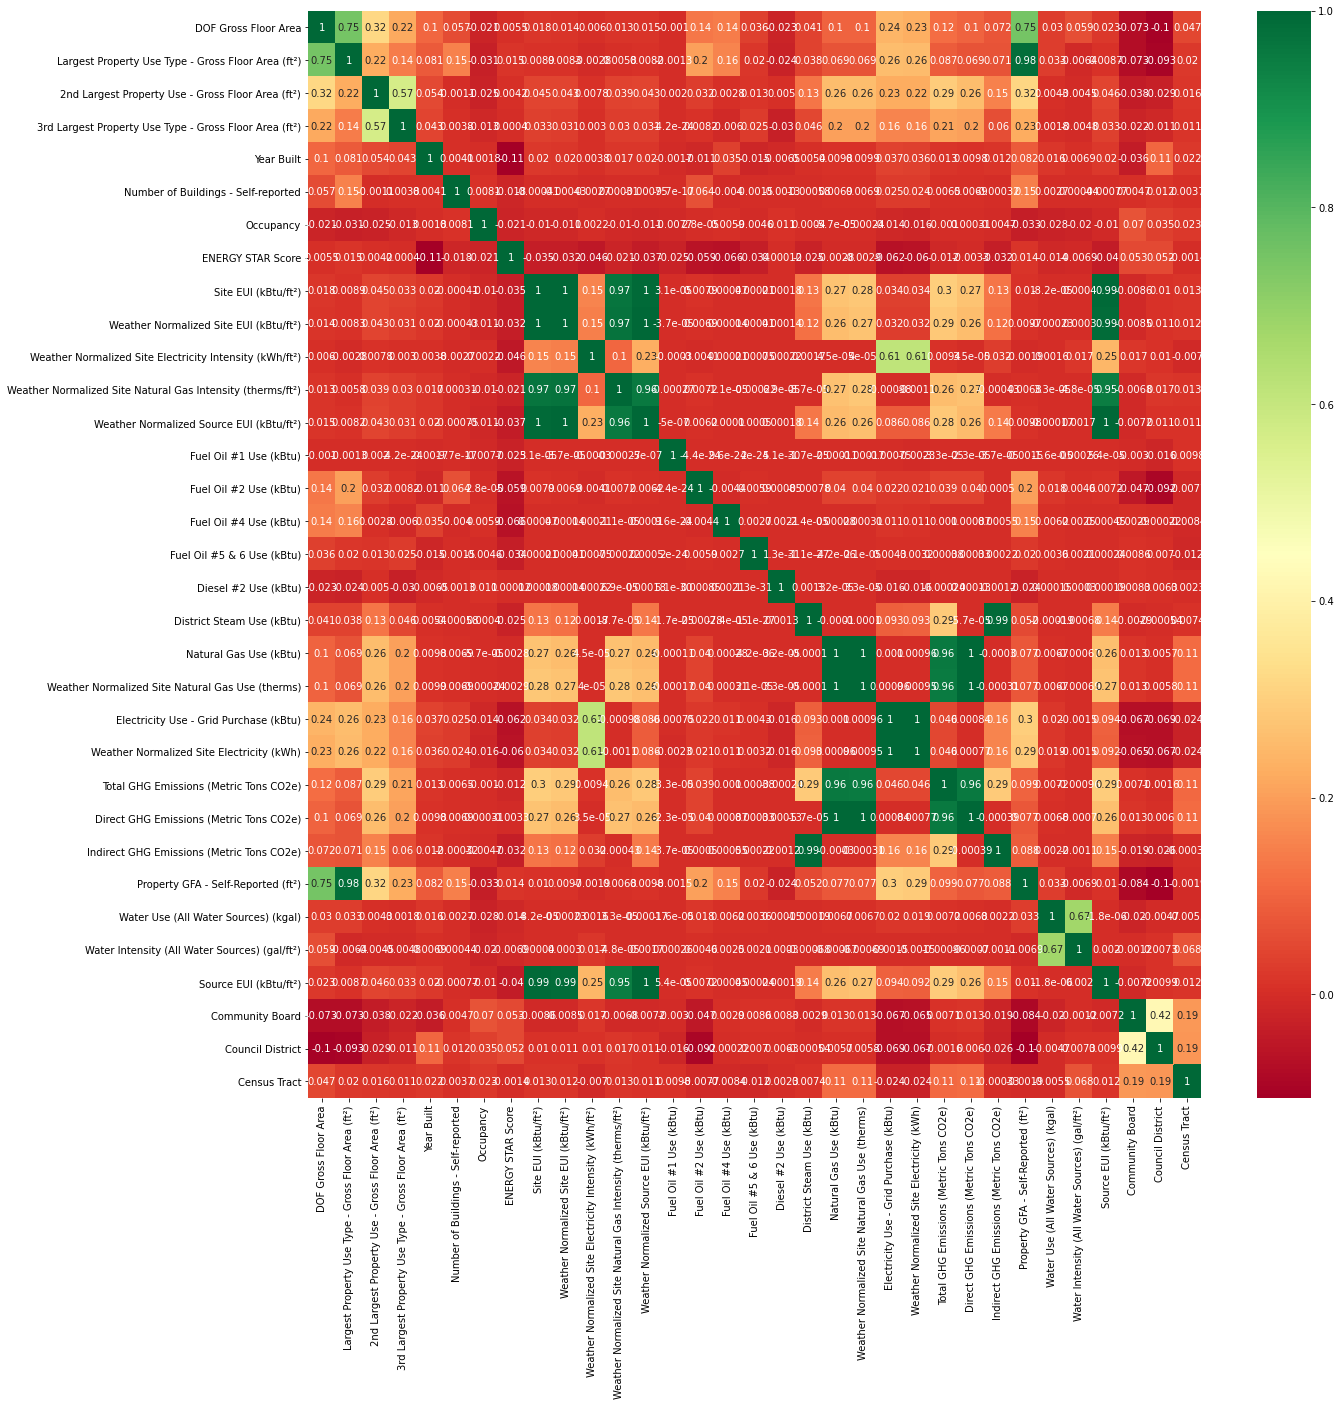

In [25]:
# Проверяем корреляцию float-признаков

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

data = train[float_cols]
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [0]:
# Удаляем скоррелированные признаки

train = train.drop(['Weather Normalized Site EUI (kBtu/ft²)','Weather Normalized Site Natural Gas Intensity (therms/ft²)','Weather Normalized Source EUI (kBtu/ft²)',
            'Site EUI (kBtu/ft²)','Largest Property Use Type - Gross Floor Area (ft²)','Property GFA - Self-Reported (ft²)','Weather Normalized Site Natural Gas Use (therms)',
            'Total GHG Emissions (Metric Tons CO2e)','Direct GHG Emissions (Metric Tons CO2e)','Weather Normalized Site Electricity (kWh)'],
           axis=1)

In [27]:
train.columns

Index(['DOF Gross Floor Area',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Fuel Oil #1 Use (kBtu)', 'Fuel Oil #2 Use (kBtu)',
       'Fuel Oil #4 Use (kBtu)', 'Fuel Oil #5 & 6 Use (kBtu)',
       'Diesel #2 Use (kBtu)', 'District Steam Use (kBtu)',
       'Natural Gas Use (kBtu)', 'Electricity Use - Grid Purchase (kBtu)',
       'Indirect GHG Emissions (Metric Tons CO2e)',
       'Water Use (All Water Sources) (kgal)',
       'Water Intensity (All Water Sources) (gal/ft²)',
       'Source EUI (kBtu/ft²)', 'Water Required?',
       'DOF Benchmarking Submission Status', 'Community Board',
       'Council District', 'Census Tract', 'Borough_Bronx', 'Borough_Brooklyn',
       'Borough_Ma

In [0]:
category_cols = ['Borough_Bronx', 'Borough_Brooklyn',
       'Borough_Manhattan', 'Borough_Other', 'Borough_Queens',
       'Borough_Staten Island',
       'Primary Property Type - Self Selected_College/University',
       'Primary Property Type - Self Selected_Hotel',
       'Primary Property Type - Self Selected_Multifamily Housing',
       'Primary Property Type - Self Selected_Non-Refrigerated Warehouse',
       'Primary Property Type - Self Selected_Office',
       'Primary Property Type - Self Selected_Other',
       'Primary Property Type - Self Selected_Residence Hall/Dormitory',
       'List of All Property Use Types at Property_Hotel',
       'List of All Property Use Types at Property_Multifamily Housing',
       'List of All Property Use Types at Property_Non-Refrigerated Warehouse',
       'List of All Property Use Types at Property_Office',
       'List of All Property Use Types at Property_Office, Retail Store',
       'List of All Property Use Types at Property_Other',
       'Largest Property Use Type_Hotel',
       'Largest Property Use Type_K-12 School',
       'Largest Property Use Type_Multifamily Housing',
       'Largest Property Use Type_Non-Refrigerated Warehouse',
       'Largest Property Use Type_Office', 'Largest Property Use Type_Other',
       'Largest Property Use Type_Residence Hall/Dormitory',
       'Largest Property Use Type_Senior Care Community',
       '2nd Largest Property Use Type_Medical Office',
       '2nd Largest Property Use Type_Office',
       '2nd Largest Property Use Type_Other',
       '2nd Largest Property Use Type_Parking',
       '2nd Largest Property Use Type_Retail Store',
       '3rd Largest Property Use Type_Medical Office',
       '3rd Largest Property Use Type_Office',
       '3rd Largest Property Use Type_Other',
       '3rd Largest Property Use Type_Parking',
       '3rd Largest Property Use Type_Retail Store']

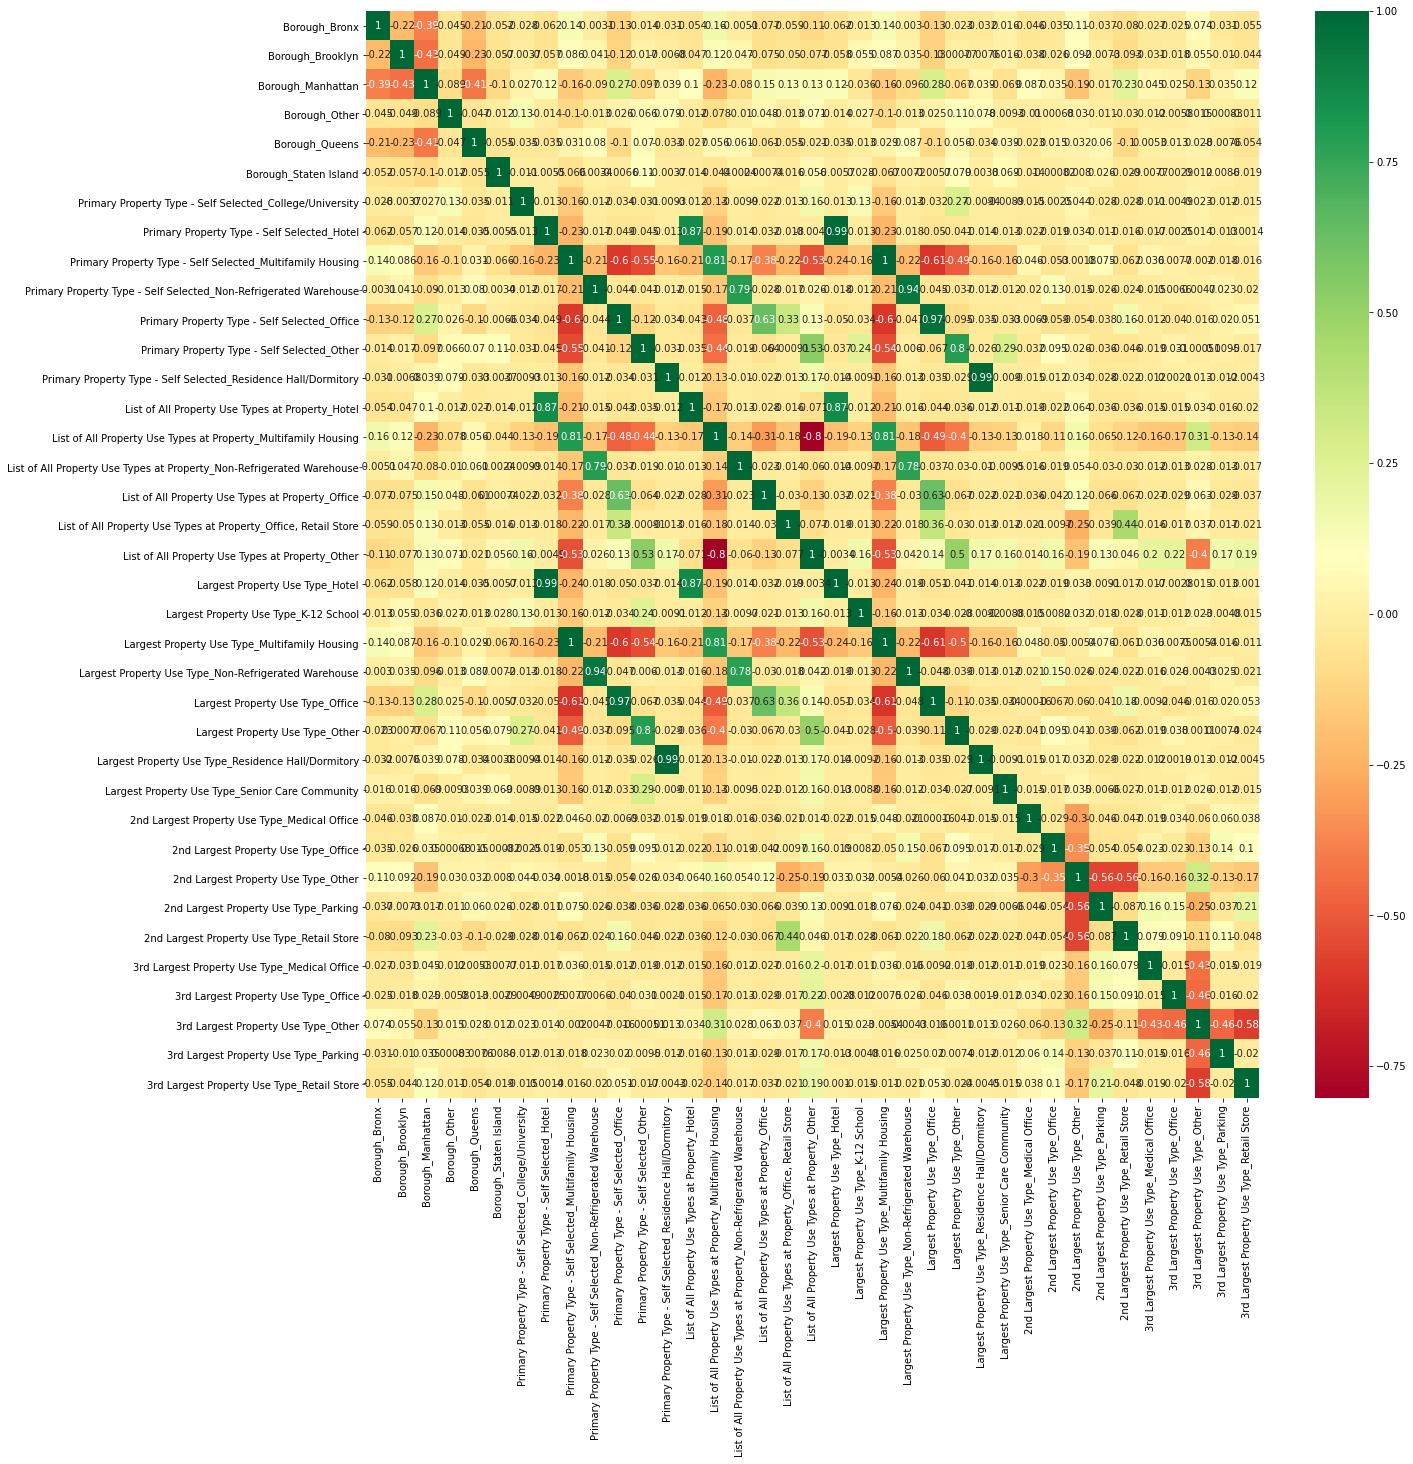

In [29]:
# Проверяем корреляцию категориальных признаков

import seaborn as sns
data = train[category_cols]
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [0]:
# Удаляем скоррелированные признаки

train = train.drop(['List of All Property Use Types at Property_Hotel',
       'List of All Property Use Types at Property_Multifamily Housing',
       'List of All Property Use Types at Property_Non-Refrigerated Warehouse',
       'List of All Property Use Types at Property_Office',
       'List of All Property Use Types at Property_Office, Retail Store',
       'Largest Property Use Type_Hotel',
       'Largest Property Use Type_Multifamily Housing',
       'Largest Property Use Type_Non-Refrigerated Warehouse',
       'Largest Property Use Type_Office','Largest Property Use Type_Other','Largest Property Use Type_Residence Hall/Dormitory'],
           axis=1)

In [31]:
train.columns

Index(['DOF Gross Floor Area',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Fuel Oil #1 Use (kBtu)', 'Fuel Oil #2 Use (kBtu)',
       'Fuel Oil #4 Use (kBtu)', 'Fuel Oil #5 & 6 Use (kBtu)',
       'Diesel #2 Use (kBtu)', 'District Steam Use (kBtu)',
       'Natural Gas Use (kBtu)', 'Electricity Use - Grid Purchase (kBtu)',
       'Indirect GHG Emissions (Metric Tons CO2e)',
       'Water Use (All Water Sources) (kgal)',
       'Water Intensity (All Water Sources) (gal/ft²)',
       'Source EUI (kBtu/ft²)', 'Water Required?',
       'DOF Benchmarking Submission Status', 'Community Board',
       'Council District', 'Census Tract', 'Borough_Bronx', 'Borough_Brooklyn',
       'Borough_Ma

In [0]:
# Стандартизируем данные

float_cols = ['DOF Gross Floor Area',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)',
       'Source EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Fuel Oil #1 Use (kBtu)', 'Fuel Oil #2 Use (kBtu)',
       'Fuel Oil #4 Use (kBtu)', 'Fuel Oil #5 & 6 Use (kBtu)',
       'Diesel #2 Use (kBtu)', 'District Steam Use (kBtu)',
       'Natural Gas Use (kBtu)', 'Electricity Use - Grid Purchase (kBtu)',
       'Indirect GHG Emissions (Metric Tons CO2e)',
       'Water Use (All Water Sources) (kgal)',
       'Water Intensity (All Water Sources) (gal/ft²)', 'Water Required?',
       'DOF Benchmarking Submission Status', 'Community Board','Council District', 'Census Tract']
df_temp = train[float_cols]

from sklearn.preprocessing import StandardScaler # MinMaxScaler RobustScaler
scaler = StandardScaler()
scaler.fit(df_temp)

df_temp_prep = scaler.transform(df_temp)
train[float_cols] = df_temp_prep

In [33]:
train['ENERGY STAR Score'].value_counts()

59.854594     2104
100.000000     649
1.000000       299
99.000000      162
80.000000      144
              ... 
10.000000       48
12.000000       47
42.000000       47
21.000000       46
11.000000       44
Name: ENERGY STAR Score, Length: 101, dtype: int64

In [0]:
# Разделяем основной датасет и таргет

X = train.drop(['ENERGY STAR Score'], axis=1)
y = train['ENERGY STAR Score']

In [35]:
print(X.shape)
print(y.shape)

(11746, 52)
(11746,)


In [36]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

# Выбираем лучшие признаки
clf = LassoCV(cv=5)

sfm = SelectFromModel(clf) #threshold=0.4
sfm.fit(X, y)

SelectFromModel(estimator=LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001,
                                  fit_intercept=True, max_iter=1000,
                                  n_alphas=100, n_jobs=None, normalize=False,
                                  positive=False, precompute='auto',
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, verbose=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

n_features = sfm.transform(X)
n_features.shape[1]

21

In [38]:
col_indexes = []
sup = sfm.get_support()
for i in range(len(sup)):
  if sup[i]:
    col_indexes.append(i)

important_cols = train.columns[col_indexes]
important_cols

Index(['DOF Gross Floor Area',
       '2nd Largest Property Use - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Fuel Oil #1 Use (kBtu)', 'Fuel Oil #2 Use (kBtu)',
       'Fuel Oil #4 Use (kBtu)', 'Natural Gas Use (kBtu)',
       'Electricity Use - Grid Purchase (kBtu)',
       'Water Intensity (All Water Sources) (gal/ft²)', 'Water Required?',
       'DOF Benchmarking Submission Status', 'Community Board',
       'Council District', 'Borough_Other',
       'Primary Property Type - Self Selected_College/University',
       'Primary Property Type - Self Selected_Non-Refrigerated Warehouse'],
      dtype='object')

In [0]:
X = sfm.transform(X)

In [40]:
print(X.shape)
print(y.shape)

(11746, 21)
(11746,)


In [0]:
from sklearn.preprocessing import PowerTransformer
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import shapiro
from scipy.stats import normaltest
import matplotlib.pyplot as plt

# Функция для нормализации признаков
def normalize(data, train):
  tests = [[data, shapiro(data)]]

  box_cox_transform = PowerTransformer(method='box-cox', standardize=False) # only works with strictly positive values
  yeo_johnson_transform = PowerTransformer(method='yeo-johnson', standardize=False) # works with positive and negative values

  box_cox = data
  if (data.values.min() > 0):
    box_cox = box_cox_transform.fit_transform(data.values.reshape(train.shape[0],-1))
  yeo_johnson = yeo_johnson_transform.fit_transform(data.values.reshape(train.shape[0],-1))
  log = np.log(data.values.reshape(train.shape[0],-1))

  tests.append([box_cox,shapiro(box_cox)])
  tests.append([yeo_johnson,shapiro(yeo_johnson)])
  tests.append([log,shapiro(log)])

  res = tests[0]
  for i in range(1,len(tests)-1):
    if tests[i][1][1] > res[1][1]:
      res = tests[i]
  
  return res[0]

In [0]:
# Опишем функцию для выборки данных, далеких от нормальных

def get_not_normalized(data, threshold):
  res = []
  for col in data.columns:
    if shapiro(data[col])[1] < threshold:
      res.append(col)

  return res

In [43]:
not_norm_columns = get_not_normalized(train[important_cols], 0.8)
not_norm_columns

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


['DOF Gross Floor Area',
 '2nd Largest Property Use - Gross Floor Area (ft²)',
 'Year Built',
 'Number of Buildings - Self-reported',
 'Occupancy',
 'Metered Areas (Energy)',
 'Metered Areas  (Water)',
 'Weather Normalized Site Electricity Intensity (kWh/ft²)',
 'Fuel Oil #1 Use (kBtu)',
 'Fuel Oil #2 Use (kBtu)',
 'Fuel Oil #4 Use (kBtu)',
 'Natural Gas Use (kBtu)',
 'Electricity Use - Grid Purchase (kBtu)',
 'Water Intensity (All Water Sources) (gal/ft²)',
 'Water Required?',
 'DOF Benchmarking Submission Status',
 'Community Board',
 'Council District',
 'Borough_Other',
 'Primary Property Type - Self Selected_College/University',
 'Primary Property Type - Self Selected_Non-Refrigerated Warehouse']

In [44]:
# Пробуем нормализовать данные

for col in not_norm_columns:
  train[col] = normalize(train[col], train)

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value enco

In [0]:
# Подготавливаем нормализованные данные для тестирования модели
from sklearn.model_selection import train_test_split

X = train[important_cols].values
Y = train['ENERGY STAR Score'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [0]:
from sklearn.model_selection import GridSearchCV

# Функция для поиска лучших параметров модели
def gridSearchResults(classifier, grid_params, x, y):
  gs = GridSearchCV(
      classifier,
      grid_params,
      verbose = 1,
      cv = 3,
      n_jobs = -1
  )

  gsResults = gs.fit(x, y)
  print("Best Score: {}".format(gsResults.best_score_))
  print("Best Estimator: {}".format(gsResults.best_estimator_))
  print("Best Params: {}".format(gsResults.best_params_))

  return gsResults.best_params_

In [51]:
# Тестируем модели

grid_params = {
  'fit_intercept': [True,False],
  'normalize': [True,False],
  'copy_X': [True]
}
lr_best_params = gridSearchResults(LinearRegression(), grid_params, X_train, Y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.11436542446412985
Best Estimator: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Best Params: {'copy_X': True, 'fit_intercept': True, 'normalize': False}


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    1.1s finished


In [52]:
grid_params = {
    'C': [1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0],
    'loss': ['epsilon_insensitive','squared_epsilon_insensitive'],
    'fit_intercept': [True,False],
    'dual': [True,False]
}
svr_best_params = gridSearchResults(LinearSVR(), grid_params, X_train, Y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   13.7s


Best Score: 0.1143714202222557
Best Estimator: LinearSVR(C=4.0, dual=False, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='squared_epsilon_insensitive',
          max_iter=1000, random_state=None, tol=0.0001, verbose=0)
Best Params: {'C': 4.0, 'dual': False, 'fit_intercept': True, 'loss': 'squared_epsilon_insensitive'}


[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   34.1s finished


In [0]:
model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [68]:
# Сравним предсказанные значения с актуальными

df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
0,25.000000,48.269224
1,55.000000,68.810259
2,59.854594,72.335119
3,79.000000,68.116051
4,58.000000,64.355381
5,59.854594,55.897815
6,89.000000,69.740924
7,37.000000,64.006019
8,79.000000,44.556290
9,89.000000,66.420550


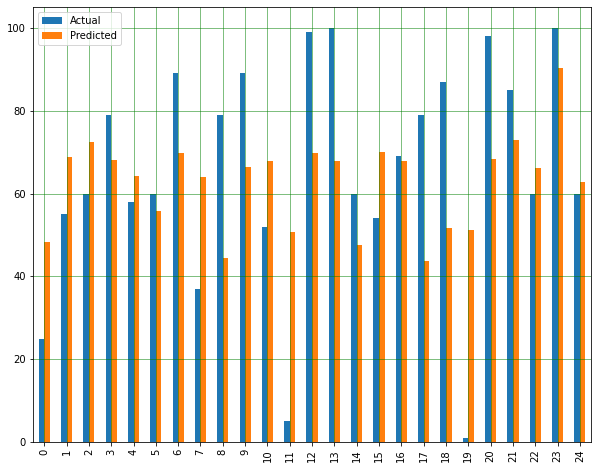

In [69]:
# Графическое сравнение

df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [72]:
# Найдем значения MAE, MSE, RMSE 

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 20.353800333084134
Mean Squared Error: 627.2658928252787
Root Mean Squared Error: 25.045276856630647


In [0]:
# Применим модель LinearSVR

model = LinearSVR(C=4.0, dual=False, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='squared_epsilon_insensitive',
          max_iter=1000, random_state=None, tol=0.0001, verbose=0)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [74]:
# Сравним предсказанные значения с актуальными

df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
0,25.000000,48.335817
1,55.000000,68.797924
2,59.854594,72.242681
3,79.000000,68.098980
4,58.000000,64.340976
5,59.854594,55.909639
6,89.000000,69.688491
7,37.000000,63.989394
8,79.000000,44.613743
9,89.000000,66.388404


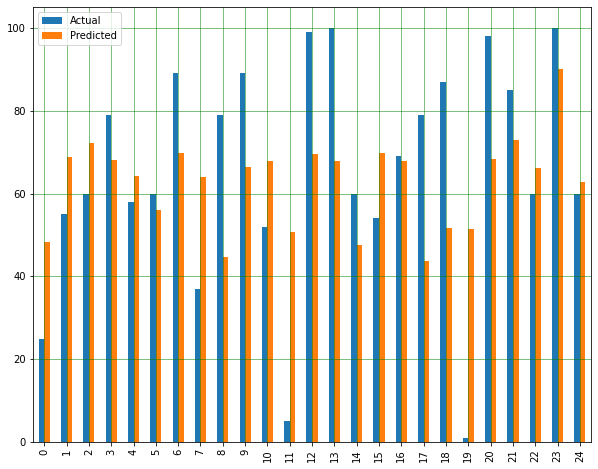

In [75]:
# Графическое сравнение

df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [76]:
# Найдем значения MAE, MSE, RMSE 

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 20.35490479882165
Mean Squared Error: 627.4552340067082
Root Mean Squared Error: 25.04905654923371
